In [10]:
import csv
import nltk
import numpy as np
import pandas as pd
from collections import defaultdict
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Specify file paths
input_file = "Results/Input records/Filtered1M.csv"
output_file = r"Results/TextualMetadataProcessing/TP_op1M.csv"

# Convert input file to CSV with selected columns
data = pd.read_csv(input_file, header=None)
data.to_csv(output_file,columns=[0,1,3,5,12,13,14],index=False,header=['LineNo','PhotoID','UserID','DateTaken','Latitude','Longitude','Accuracy'])

# Load the CSV file
data = pd.read_csv(output_file)
tokenizer = RegexpTokenizer(r'[a-zA-Z_]+')
data['Tags'] = ""

tagPid = defaultdict(list)
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

for i in range(len(data)):
    user_tag=str(data[10][i])
    user_tag+=str(data[8][i])
    user_tag+=str(data[9][i])
    filtered = []
    filtered = list(set(filtered + tokenizer.tokenize(user_tag)))
    stop_removed = [w for w in filtered if w not in stop_words]
    stemmed = [lemmatizer.lemmatize(w) for w in stop_removed]
    nouns = [w for w, pos in nltk.pos_tag(stemmed) if pos.startswith('NN')]
    final = list(set(nouns))
    k = ' '.join(final)

    data.at[i, 'Tags'] = k

    for g in final:
        tagPid[g].append(data.iloc[i, 1])

# Save processed data to a new CSV file
data.to_csv(output_file, index=False)

# Create a binary matrix to track tag usage
Info = list(tagPid.keys())
bv = np.zeros((len(data), len(Info)), dtype=int)

for i, tags in enumerate(data['Tags']):
    for w in Info:
        if w in tags.split():
            bv[i, Info.index(w)] = 1

# Filter tags that appear more than once
int_tags = {w: np.sum(bv[:, i]) for i, w in enumerate(Info) if np.sum(bv[:, i]) > 1}

# Find interesting words based on threshold
threshold = 1 / len(data)
interested = {w: int_tags[w] / len(data) for w in int_tags if int_tags[w] / len(data) > threshold}

# Find photo IDs corresponding to interesting words
photo_id = list(set([pid for w in interested for pid in tagPid[w]]))
df = data[data['PhotoID'].isin(photo_id)]

# Save the final result to a new CSV file
df.to_csv(output_file, columns=['PhotoID', 'UserID', 'Latitude', 'Longitude', 'Accuracy'], index=False)


KeyError: 10

In [11]:
import csv
import nltk
import numpy as np
import pandas as pd
from collections import defaultdict
from nltk.tokenize import sent_tokenize, word_tokenize,RegexpTokenizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import os

# Specify directory and convert to CSV
input_file = "Results/Input records/Filtered1M.csv"
output_file = r"Results/TextualMetadataProcessing/TP_op1M.csv"
data = pd.read_csv(input_file, header=None)
data.to_csv(output_file,columns=[0,1,3,5,12,13,14],index=False,header=['LineNo','PhotoID','UserID','DateTaken','Latitude','Longitude','Accuracy'])

# Convert input file to CSV with selected columns

#data = pd.read_csv(output_file, header=None)
data2 = pd.read_csv(output_file)
tokenizer = RegexpTokenizer(r'[a-zA-Z_]+')
data2['Tags'] = ""
Info=[]
tagPid=defaultdict(list)

#Selecting appropriate metadata
for i in range(0,len(data.index)):
    user_tag=str(data[10][i])
    user_tag+=str(data[8][i])
    user_tag+=str(data[9][i])
    filtered = []
    filtered = list(set(filtered + tokenizer.tokenize(user_tag)))


    # removing stop words
    stop_words = set(stopwords.words('english'))
    stop_removed =[]
    for w in filtered:
        if w not in stop_words:
            stop_removed.append(w)

    # reducing words to their root form
    stemmed=[]
    lemmatizer = WordNetLemmatizer()
    for w in stop_removed:
        stemmed.append(lemmatizer.lemmatize(w))

    # obtain only nouns
    nouns = []
    for w in stemmed:
        for word,pos in nltk.pos_tag(w):
             if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS'):
                nouns.append(w)

    #Appending words in root form to file
    k=""
    final = list(set(nouns))
    for g in final:
        k+=g
        if g in tagPid.keys():
            tagPid[g].append(data[1][i])
        else:
            tagPid[g].append(data[1][i])
        k+=" "
    Info+=final
    
    data2["Tags"][i]=k
    
Info=list(set(Info))
# change file name
data2.to_csv("C:\YFCC_Dataset\Textproc1M.csv",index=False)
newfile= "C:\YFCC_Dataset\Textproc1M.csv"
newframe = pd.read_csv(newfile)

#Binary vector to find which all tags have been used
bv = np.zeros(shape=(len(data.index),len(Info)))
int_tags={}
for w in Info:
    int_tags[w]=0
tags=newframe.Tags
for s in tags:
    i=0
    l=s.split(" ")
    count=0
    for w in Info:
        if w in l:
            count+=1
            bv[i][Info.index(w)]=1
            
            int_tags[w]+=1
            i+=1
            
#Filtering tags which appear more than 1 time
i=0
count=0
for i in int_tags.keys():
    if int_tags[i] > 1:
        count+=1
#Finding the interesting words based on threshold
interested={}
threshold = 1/len(newframe)
for w in Info:

    if int_tags[w]/len(newframe) > threshold:
        interested[w] = int_tags[w]/len(Info)
#Finding photo ID corresponding to interesting words
photo_id=[]
for w in interested.keys():
    photo_id=list(set(photo_id+tagPid[w]))
df=newframe.query('PhotoID in @photo_id')     
df.to_csv("C:\YFCC_Dataset\TP_op1M.csv",columns=['PhotoID','UserID','Latitude','Longitude','Accuracy'],index=False,header=['PhotoID','UserID','Latitude','Longitude','Accuracy'])

TypeError: tokens: expected a list of strings, got a string

In [13]:
import csv
import nltk
import numpy as np
import pandas as pd
from collections import defaultdict
from nltk.tokenize import sent_tokenize, word_tokenize,RegexpTokenizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import os

# Specify directory and convert to CSV
location="Results/Input records/Filtered1M.csv"
data = pd.read_csv(location, header=None)
data.to_csv("Results/TextualMetadataProcessing/TP1M.csv",columns=[0,1,3,5,12,13,14],index=False,header=['LineNo','PhotoID','UserID','DateTaken','Latitude','Longitude','Accuracy'])

# Change file name
location="Results/Input records/Filtered1M.csv"
dest = "Results/TextualMetadataProcessing/TP1M.csv"
data = pd.read_csv(location, header=None)
tokenizer = RegexpTokenizer(r'[a-zA-Z_]+')
data2 = pd.read_csv(dest)
data2['Tags'] = ""
Info=[]
tagPid=defaultdict(list)

#Selecting appropriate metadata
for i in range(0,len(data.index)):
    user_tag=str(data[10][i])
    user_tag+=str(data[8][i])
    user_tag+=str(data[9][i])
    filtered = []
    filtered = list(set(filtered + tokenizer.tokenize(user_tag)))


    # removing stop words
    stop_words = set(stopwords.words('english'))
    stop_removed =[]
    for w in filtered:
        if w not in stop_words:
            stop_removed.append(w)

    # reducing words to their root form
    stemmed=[]
    lemmatizer = WordNetLemmatizer()
    for w in stop_removed:
        stemmed.append(lemmatizer.lemmatize(w))

    # obtain only nouns
    nouns = []
    for w in stemmed:
        for word,pos in nltk.pos_tag(w):
             if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS'):
                nouns.append(w)

    #Appending words in root form to file
    k=""
    final = list(set(nouns))
    for g in final:
        k+=g
        if g in tagPid.keys():
            tagPid[g].append(data[1][i])
        else:
            tagPid[g].append(data[1][i])
        k+=" "
    Info+=final
    
    data2["Tags"][i]=k
    
Info=list(set(Info))
# change file name
data2.to_csv("Results/TextualMetadataProcessing/Textproc1M.csv",index=False)
newfile= "Results/TextualMetadataProcessing/Textproc1M.csv"
newframe = pd.read_csv(newfile)

#Binary vector to find which all tags have been used
bv = np.zeros(shape=(len(data.index),len(Info)))
int_tags={}
for w in Info:
    int_tags[w]=0
tags=newframe.Tags
for s in tags:
    i=0
    l=s.split(" ")
    count=0
    for w in Info:
        if w in l:
            count+=1
            bv[i][Info.index(w)]=1
            
            int_tags[w]+=1
            i+=1
            
#Filtering tags which appear more than 1 time
i=0
count=0
for i in int_tags.keys():
    if int_tags[i] > 1:
        count+=1
#Finding the interesting words based on threshold
interested={}
threshold = 1/len(newframe)
for w in Info:

    if int_tags[w]/len(newframe) > threshold:
        interested[w] = int_tags[w]/len(Info)
#Finding photo ID corresponding to interesting words
photo_id=[]
for w in interested.keys():
    photo_id=list(set(photo_id+tagPid[w]))
df=newframe.query('PhotoID in @photo_id')     
df.to_csv("Results/TextualMetadataProcessing/TP_op1M.csv",columns=['PhotoID','UserID','Latitude','Longitude','Accuracy'],index=False,header=['PhotoID','UserID','Latitude','Longitude','Accuracy'])

TypeError: tokens: expected a list of strings, got a string

In [39]:
import numpy as np
months=np.asarray(months)
months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [12]:
import pandas as pd
import statsmodels.api as sm

# Step 1: Read and preprocess the data
df = pd.read_csv('Tourist-Behaviour-Analysis/Results/Input records/Filtered1M.csv')  # Replace 'tourist_data.csv' with your dataset file

# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index
df.set_index('Date', inplace=True)

# Resample the data on a monthly basis and count the number of tourists
monthly_data = df.resample('M').count()

# Step 2: Time series modeling
model = sm.tsa.ARIMA(monthly_data, order=(1, 1, 1))
results = model.fit()

# Step 3: Forecasting
forecast_steps = 12  # Number of future months to forecast
forecast = results.get_forecast(steps=forecast_steps)

# Get the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Step 4: Visualization
ax = monthly_data.plot(label='Actual')
forecast_values.plot(ax=ax, label='Forecast')
ax.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='k', alpha=0.1)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Tourists')
ax.set_title('Monthly Tourist Count with Forecast')
ax.legend()
plt.show()


,150,4684204212,b96c05d663f487e6cf3d08e79746d79,22602880@N00,raffik,08-06-2010,1276050666,Apple+iPhone+3GS,%40brianellin%27s+dinner,Unnamed: 9,...,Attribution-NonCommercial-ShareAlike License,http://creativecommons.org/licenses/by-nc-sa/2.0/,4066,5,a21c2bc9c9,3e0c1fbf06,jpg,0,Unnamed: 25,Unnamed: 26
0,305,5377288276,f28ea4705e8b5116ef826777f7f43db,27793548@N06,Morgan+Rochele,19-01-2011,1295674120,Canon+EOS+DIGITAL+REBEL+XTi,NaN,NaN,...,Attribution-NonCommercial-NoDerivs License,http://creativecommons.org/licenses/by-nc-nd/2.0/,5005,6,4bbc892e99,410ef06406,jpg,0,NaN,NaN
1,360,265139537,a8ab7a3ec2e1839b5fe8f2844621f8b,53687766@N00,casch52,08-10-2006,1160413308,Canon+EOS+20D,Blue+Angels+0304,All+6,...,Attribution-NonCommercial-NoDerivs License,http://creativecommons.org/licenses/by-nc-nd/2.0/,96,1,b587ebd9ca,b587ebd9ca,jpg,0,NaN,NaN
2,571,7506210980,5e6c143ba8c5a4416919c4c26476ea1c,70221037@N00,renedrivers,04-07-2012,1341469210,SONY+DSC-HX200V,San+Francisco+4th+of+July+Fireworks+2012,NaN,...,Attribution-NonCommercial-NoDerivs License,http://creativecommons.org/licenses/by-nc-nd/2.0/,8011,9,624828b9df,5c6ebf6793,jpg,0,NaN,NaN
3,725,4272303739,10b55e16cd573887f11db22ba35bfea,34415916@N07,ganeshaisis,12-01-2010,1263429831,Canon+EOS+DIGITAL+REBEL+XTi,Graff+on+Cargo+Container+%40+SOTA,By+Ganesha+Balunsat,...,Attribution License,http://creativecommons.org/licenses/by/2.0/,2761,3,037b6623cd,0096053670,jpg,0,NaN,NaN
4,1057,9177350502,288d7d68dfc3bb25f8924f322e898c3,95881098@N00,noneck,30-06-2013,1372615863,NaN,%40chachasikes+%26+I+walking+with+CA%27s+Lt.+G...,NaN,...,Attribution-NonCommercial License,http://creativecommons.org/licenses/by-nc/2.0/,5322,6,0074cbe81e,0fdc7bb2cc,jpg,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2664,997173,2790544511,77db82ed2dd250ce56e193a228ffb784,8021736@N06,mcgrayjr,23-08-2008,1219542056,OLYMPUS+IMAGING+CORP.+E-500,Aloe,Aloe,...,Attribution-ShareAlike License,http://creativecommons.org/licenses/by-sa/2.0/,3140,4,f3cf1b6117,bc008b4512,jpg,0,NaN,NaN
2665,997812,10345301,ec5a247836fee023b63987bf72e77ada,53546415@N00,Gene+Hsu,03-10-2004,1114143499,Canon+PowerShot+S1+IS,IMG_0355,NaN,...,Attribution-NonCommercial-ShareAlike License,http://creativecommons.org/licenses/by-nc-sa/2.0/,6,1,c014ad4de9,c014ad4de9,jpg,0,NaN,NaN
2666,998840,2715406862,b71bf6fb575e63da87b49443eeb0,23004521@N02,rafeejewell,29-07-2008,1217373249,NaN,CHILL+AREA+NEXT+TO+RIVER,I+started+my+Second+Life+on+%3Ca+href%3D%22htt...,...,Attribution-NoDerivs License,http://creativecommons.org/licenses/by-nd/2.0/,3197,4,1d8fdd2ee4,a101418dd7,jpg,0,NaN,NaN
2667,998868,195266729,aea2ad5a20be7ff8d21171aa69f5d27,45423318@N00,Chen+Yang,21-07-2006,1153562167,SONY+DSC-R1,7%2F21%2F06%40AT%26T+Park+vs.+Padres,Yahoo%21+2006+Internship+program%21++We+went+t...,...,Attribution-NonCommercial-NoDerivs License,http://creativecommons.org/licenses/by-nc-nd/2.0/,59,1,7a9411b36b,7a9411b36b,jpg,0,NaN,NaN


In [22]:
df2=pd.to_datetime(df[5])


KeyError: 5

In [30]:
df.set_index(5, inplace=True)

# Resample the data on a monthly basis and count the number of tourists
monthly_data = df.resample('M').count()

In [45]:
monthly_data

,0,1,2,3,4,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
5,,,,,,,,,,,,,,,,,,,,,
1978-11-30,1,1,1,1,1,1,0,1,0,1,...,1,1,1,1,1,1,1,1,1,1
1978-12-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1979-01-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1979-02-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1979-03-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-31,9,9,9,9,9,9,9,8,3,9,...,9,9,9,9,9,9,9,9,9,9
2014-01-31,5,5,5,5,5,5,3,5,2,4,...,5,5,5,5,5,5,5,5,5,5
2014-02-28,11,11,11,11,11,11,9,10,4,8,...,11,11,11,11,11,11,11,11,11,11


In [40]:
# Step 2: Time series modeling
model = sm.tsa.ARIMA(months, order=(1, 1, 1))
results = model.fit()

# Step 3: Forecasting
forecast_steps = 12  # Number of future months to forecast
forecast = results.get_forecast(steps=forecast_steps)

# Get the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


AttributeError: 'numpy.ndarray' object has no attribute 'plot'

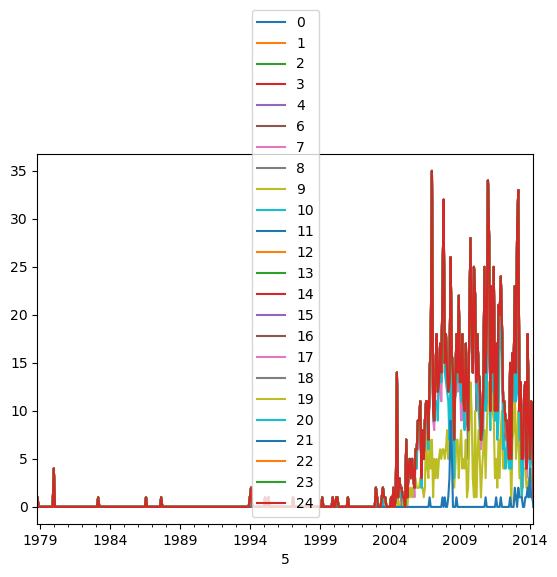

In [43]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

forecast_steps = 12  # Number of future months to forecast
forecast = results.get_forecast(steps=forecast_steps)

# Get the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Step 4: Visualization
ax = monthly_data.plot(label='Actual')
forecast_values.plot(ax=ax, label='Forecast')
ax.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='k', alpha=0.1)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Tourists')
ax.set_title('Monthly Tourist Count with Forecast')
ax.legend()
plt.show()

In [46]:
ls

 Volume in drive C has no label.
 Volume Serial Number is B810-5BBC

 Directory of C:\Users\HP\Tourist-Behaviour-Analysis

11-07-2023  12:12    <DIR>          .
11-07-2023  12:02    <DIR>          ..
11-07-2023  11:42    <DIR>          .ipynb_checkpoints
11-07-2023  09:33             4,589 README.md
11-07-2023  11:48    <DIR>          Results
11-07-2023  11:48    <DIR>          Tasks
11-07-2023  12:12           110,088 Untitled.ipynb
               2 File(s)        114,677 bytes
               5 Dir(s)  113,651,105,792 bytes free


In [1]:
cd Tasks/

C:\Users\HP\Tourist-Behaviour-Analysis\Tasks


In [3]:
!python3 Text_Metadata_Proc.py

Traceback (most recent call last):
  File "C:\Users\HP\Tourist-Behaviour-Analysis\Tasks\Text_Metadata_Proc.py", line 2, in <module>
    import nltk
ModuleNotFoundError: No module named 'nltk'


In [14]:
import csv
import nltk
import numpy as np
import pandas as pd
from collections import defaultdict
from nltk.tokenize import sent_tokenize, word_tokenize,RegexpTokenizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import os

# Specify directory and convert to CSV
import pandas as pd
location="Results/Input records/Filtered1M.csv"
data = pd.read_csv(location, header=None)
data.to_csv("Results/Input records/TP1M.csv",columns=[0,1,3,5,12,13,14],index=False,header=['LineNo','PhotoID','UserID','DateTaken','Latitude','Longitude','Accuracy'])

# Change file name
location="Results/Input records/Filtered1M.csv"
dest = "Results/Input records/TP1M.csv"
data = pd.read_csv(location, header=None)
tokenizer = RegexpTokenizer(r'[a-zA-Z_]+')
data2 = pd.read_csv(dest)
data2['Tags'] = ""
Info=[]
tagPid=defaultdict(list)

In [15]:
from nltk.corpus import stopwords

#Selecting appropriate metadata
for i in range(0,len(data.index)):
    user_tag=str(data[10][i])
    user_tag+=str(data[8][i])
    user_tag+=str(data[9][i])
    filtered = []
    filtered = list(set(filtered + tokenizer.tokenize(user_tag)))


    # removing stop words
    stop_words = set(stopwords.words('english'))
    stop_removed =[]
    for w in filtered:
        if w not in stop_words:
            stop_removed.append(w)

    # reducing words to their root form
    stemmed=[]
    lemmatizer = WordNetLemmatizer()
    for w in stop_removed:
        stemmed.append(lemmatizer.lemmatize(w))

    # obtain only nouns
    nouns = []
    for w in stemmed:
        for word,pos in nltk.pos_tag([w]):
             if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS'):
                nouns.append(w)

    #Appending words in root form to file
    k=""
    final = list(set(nouns))
    for g in final:
        k+=g
        if g in tagPid.keys():
            tagPid[g].append(data[1][i])
        else:
            tagPid[g].append(data[1][i])
        k+=" "
    Info+=final
    
    data2["Tags"][i]=k
Info=list(set(Info))

C:\Users\HP\AppData\Local\Temp\ipykernel_17864\3674161021.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["Tags"][i]=k


In [16]:
data2.to_csv("Results/Input records/Textproc1M.csv",index=False)
newfile= "Results/Input records/Textproc1M.csv"
newframe = pd.read_csv(newfile)

#Binary vector to find which all tags have been used
bv = np.zeros(shape=(len(data.index),len(Info)))
int_tags={}
for w in Info:
    int_tags[w]=0
tags=newframe.Tags
for s in tags:
    i=0
    l=s.split(" ")
    count=0
    for w in Info:
        if w in l:
            count+=1
            bv[i][Info.index(w)]=1
            
            int_tags[w]+=1
            i+=1
            
#Filtering tags which appear more than 1 time
i=0
count=0
for i in int_tags.keys():
    if int_tags[i] > 1:
        count+=1
#Finding the interesting words based on threshold
interested={}
threshold = 1/len(newframe)
for w in Info:

    if int_tags[w]/len(newframe) > threshold:
        interested[w] = int_tags[w]/len(Info)
#Finding photo ID corresponding to interesting words
photo_id=[]
for w in interested.keys():
    photo_id=list(set(photo_id+tagPid[w]))
df=newframe.query('PhotoID in @photo_id')     
df.to_csv("Results/TextualMetadataProcessing/TP_op1M.csv",columns=['PhotoID','UserID','Latitude','Longitude','Accuracy'],index=False,header=['PhotoID','UserID','Latitude','Longitude','Accuracy'])
print('Tp_op1M csv file is created in TextualMetadataProcessing folder for further processing')

Tp_op1M csv file is created in TextualMetadataProcessing folder for further processing


In [37]:
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import hdbscan
import folium
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors

#Loading CSV File (Output of Text processing step)
uk = "Tourist-Behaviour-Analysis/Results/Input records/TP_op1M.csv"
rad="C:\YFCC_Dataset\Rad.csv"
df = pd.read_csv(uk)
df1=df
coord={}
#Extracting Latitude and Longitude from interesting photos found in previous step.
Lat=np.asarray(df['Latitude'])
Long=np.asarray(df['Longitude'])
coords = df.as_matrix(columns=['Longitude',"Latitude"])
#converting to radians to make it easier for HDBSCAN clustering algorithm
rads = np.radians(coords)
#Clustering step
clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0,metric='haversine', gen_min_span_tree=True, min_cluster_size=20, min_samples=None, p=None).fit(rads)
cluster_labels = clusterer.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(-1, num_clusters)])
cluster_label=(clusterer.labels_)
x = cluster_label
cluster_points={}
for i in range(0,noc+1):
    cluster_points[i]=[]
    
cluster_points[-1]=[]

for i in range(0,len(x)):
    l=cluster_points[x[i]]
    l.append(coords[i])
    cluster_points[x[i]]=l

plt.figure(figsize = (12, 12))

#plotting points on map
m = Basemap(projection='merc', resolution='l', epsg = 4269, 
            llcrnrlon=-122.567288,llcrnrlat=37.696627, urcrnrlon=-122.329308,urcrnrlat=37.852144)

# plot the aftershock
x, y = m(coords[:, 1], coords[:, 0])
m.scatter(x,y,5,marker='o',color='b')
m.arcgisimage(service='World_Shaded_Relief', xpixels = 5000, verbose= False)
plt.show()

ModuleNotFoundError: No module named 'hdbscan'

In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is B810-5BBC

 Directory of C:\Users\HP\Tourist-Behaviour-Analysis

13-07-2023  11:36    <DIR>          .
12-07-2023  12:54    <DIR>          ..
11-07-2023  16:59    <DIR>          .ipynb_checkpoints
12-07-2023  22:23    <DIR>          CodeFile
11-07-2023  09:33             4,589 README.md
11-07-2023  11:48    <DIR>          Results
13-07-2023  11:36           277,131 Untitled.ipynb
               2 File(s)        281,720 bytes
               5 Dir(s)  108,471,939,072 bytes free


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.82554e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.87252e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.287e+03, tolerance: 1.841e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check

5.570096763663404

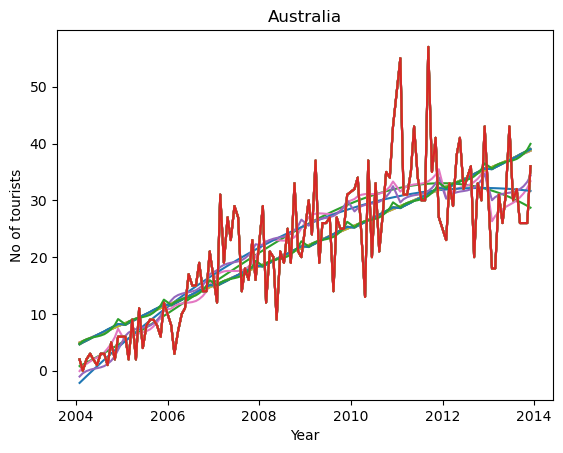

In [9]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error,mean_squared_error
%matplotlib inline
from sklearn import linear_model as lm
regr = lm.LinearRegression()
clf = lm.Lasso(alpha=0.1)

#Loading CSV corresponding to a particular region
df=pd.read_csv("Results/TrendEstimation/fullaustralia.csv",header=None)
df2=pd.to_datetime(df[5])
months = list(range(1,13))
year = list(range(2004,2014))
df[5]=pd.to_datetime(df[5])
ct=[]

X_my=[]
for i in year:
    for j in months:
        l=[j,i]
        X_my.append(l)
        ct.append(len(df.loc[operator.and_( df[5].dt.year == i , df[5].dt.month == j ) ] ) )

months = list(range(1,13))

df[5]=pd.to_datetime(df[5])
ct_test=[]
#my=[]
X_my_test=[]
i=2014
for j in months:
    l=[j,i]
    X_my_test.append(l)
   #my.append(s)
    ct_test.append(len(df.loc[operator.and_( df[5].dt.year == i , df[5].dt.month == j ) ] ) )
X_my = np.asarray(X_my)
Ct = np.asarray(ct).reshape(-1,1)
X_my_test = np.asarray(X_my_test)
Ct_test = np.asarray(ct_test).reshape(-1,1)
X_my

# NORMALISNG MONTH-YEAR VALUE
nry=[]
for i in X_my:
    g=i[0]
    k=i[1]
    norm=k+(round((g/13),2))
    nry.append(norm)

nry_test=[]
for i in X_my_test:
    g=i[0]
    k=i[1]
    norm=k+(round((g/13),2))
    nry_test.append(norm)

#Linear - deg 1 and 2
poly = make_pipeline(PolynomialFeatures(1),regr)

#nry vs no of tourists
#Trying out various combinations

poly.fit(np.asarray(nry).reshape(-1,1) , Ct)
Y_pred=poly.predict(np.asarray(nry).reshape(-1,1))
plt.plot(np.asarray(nry),Y_pred.reshape(-1,1))
plt.plot(np.asarray(nry),Ct)
mean_absolute_error(Ct , Y_pred)

poly = make_pipeline(PolynomialFeatures(3),regr)
poly.fit(np.asarray(nry).reshape(-1,1),Ct)
Y_pred=poly.predict(np.asarray(nry).reshape(-1,1))
plt.plot(np.asarray(nry),Y_pred)
plt.plot(np.asarray(nry),Ct)
mean_absolute_error(Ct , Y_pred)

poly = make_pipeline(PolynomialFeatures(1),regr)

#X_my vs No of tourists

poly.fit(X_my, Ct)
Y_pred=poly.predict(X_my)
plt.plot(np.asarray(nry),Y_pred.reshape(-1,1))
plt.plot(np.asarray(nry),Ct)
mean_absolute_error(Ct , Y_pred)

poly = make_pipeline(PolynomialFeatures(3),regr)
poly.fit(X_my,Ct)
Y_pred=poly.predict(X_my)
plt.plot(np.asarray(nry),Y_pred)
plt.plot(np.asarray(nry),Ct)
mean_absolute_error(Ct , Y_pred)

#Ridge - deg 1 and 2
poly = make_pipeline(PolynomialFeatures(1),Ridge())

#nry vs no of tourists

poly.fit(np.asarray(nry).reshape(-1,1) , Ct)
Y_pred=poly.predict(np.asarray(nry).reshape(-1,1))
plt.plot(np.asarray(nry),Y_pred.reshape(-1,1))
plt.plot(np.asarray(nry),Ct)
mean_absolute_error(Ct , Y_pred)


poly = make_pipeline(PolynomialFeatures(3),Ridge())
poly.fit(np.asarray(nry).reshape(-1,1),Ct)
Y_pred=poly.predict(np.asarray(nry).reshape(-1,1))
plt.plot(np.asarray(nry),Y_pred)
plt.plot(np.asarray(nry),Ct)
mean_absolute_error(Ct , Y_pred)

poly = make_pipeline(PolynomialFeatures(1),Ridge())

#X_my vs No of tourists
poly.fit(X_my, Ct)
Y_pred=poly.predict(X_my)
plt.plot(np.asarray(nry),Y_pred.reshape(-1,1))
plt.plot(np.asarray(nry),Ct)
mean_absolute_error(Ct , Y_pred)

poly = make_pipeline(PolynomialFeatures(3),Ridge())
poly.fit(X_my,Ct)
Y_pred=poly.predict(X_my)
plt.plot(np.asarray(nry),Y_pred)
plt.plot(np.asarray(nry),Ct)
mean_absolute_error(Ct , Y_pred)

#Lasso - deg 1 and 2
poly = make_pipeline(PolynomialFeatures(1),clf)

#nry vs no of tourists

poly.fit(np.asarray(nry).reshape(-1,1) , Ct)
Y_pred=poly.predict(np.asarray(nry).reshape(-1,1))
plt.plot(np.asarray(nry),Y_pred.reshape(-1,1))
plt.plot(np.asarray(nry),Ct)
mean_absolute_error(Ct , Y_pred)

poly = make_pipeline(PolynomialFeatures(3),clf)
poly.fit(np.asarray(nry).reshape(-1,1),Ct)
Y_pred=poly.predict(np.asarray(nry).reshape(-1,1))
plt.plot(np.asarray(nry),Y_pred)
plt.plot(np.asarray(nry),Ct)
mean_absolute_error(Ct , Y_pred)

#X_my vs No of tourists

poly = make_pipeline(PolynomialFeatures(1),clf)

poly.fit(X_my, Ct)
Y_pred=poly.predict(X_my)
plt.plot(np.asarray(nry),Y_pred.reshape(-1,1))
plt.plot(np.asarray(nry),Ct)
mean_absolute_error(Ct , Y_pred)
poly = make_pipeline(PolynomialFeatures(3),clf)

poly.fit(X_my,Ct)
Y_pred=poly.predict(X_my)
plt.plot(np.asarray(nry),Y_pred)
plt.plot(np.asarray(nry),Ct)
plt.title("Australia")

mean_absolute_error(Ct , Y_pred)

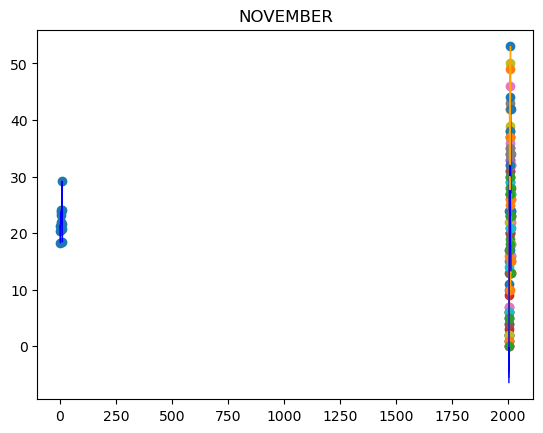

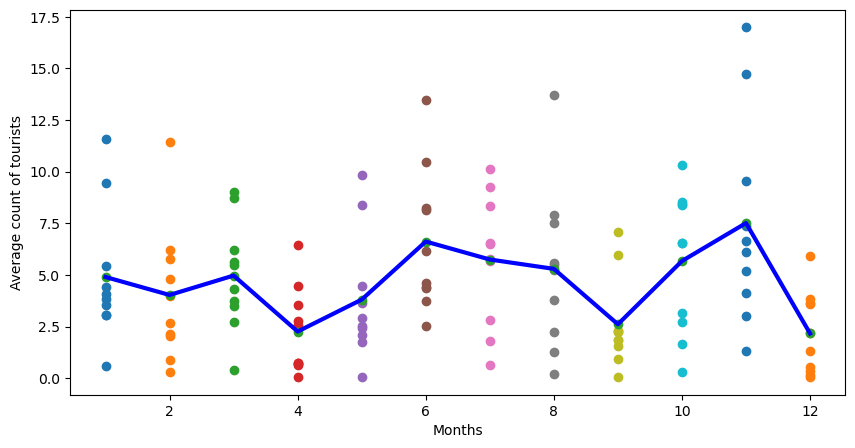

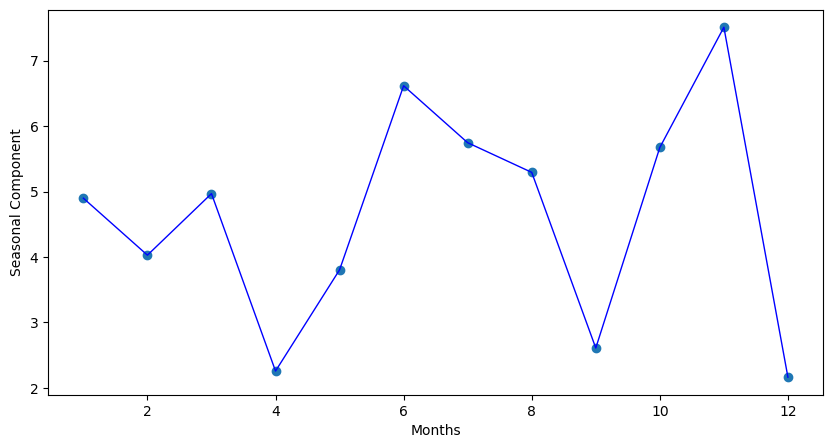

In [25]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error,mean_squared_error
%matplotlib inline
import sklearn
import sklearn.linear_model as lm

#Opening CSV File corresponding to a particular region
location="Results/Input records/Filtered1M.csv"
df = pd.read_csv(location, header=None)
df2 = pd.to_datetime(df[5], format='%d-%m-%Y')
months = list(range(1,13))
df[5]=pd.to_datetime(df[5], format='%d-%m-%Y')
ct=[]
#Finding data wrt to each Month
for i in months:
    ct.append(len(df.loc[(df[5].dt.month == i ) ] ) )
for i in range(len(ct)):
    ct[i]=ct[i]/10

months=np.asarray(months)
count = np.asarray(ct)
plt.scatter(months,count)
plt.plot(months,count, color='blue', linewidth=1)
months = list(range(1,13))
year = list(range(2004,2014))
allmonths={}

for i in months:
    allmonths[i]=[]
for i in year:
    for j in months:
        allmonths[j].append(len(df.loc[operator.and_( df[5].dt.year == i , df[5].dt.month == j ) ] ) )

#Checking value for April



regr = lm.LinearRegression()
sc=[]
#Plotting data for each month to find Trend for that particular month

#January
monthCt=np.asarray(allmonths[1])
yr=np.asarray(year)

plt.scatter(year,monthCt)

poly = make_pipeline(PolynomialFeatures(2),regr)

poly.fit(yr.reshape(-1,1) , monthCt)

Y_pred=poly.predict(yr.reshape(-1,1).reshape(-1,1))

plt.plot(year,monthCt, color="orange" ,linewidth=1 )
plt.plot(year,Y_pred.reshape(-1,1), color='blue', linewidth=1 )

month_diff=[]
jan_diff=[]
for i in range(len(monthCt)):
    jan_diff.append(abs(monthCt[i]-Y_pred[i]))
month_diff.append(jan_diff)
    
sc.append(mean_absolute_error(monthCt , Y_pred))

plt.title("JANUARY")
mean_absolute_error(monthCt , Y_pred)

#February
monthCt=np.asarray(allmonths[2])
yr=np.asarray(year)

plt.scatter(year,monthCt)

poly = make_pipeline(PolynomialFeatures(3),regr)

poly.fit(yr.reshape(-1,1) , monthCt)

Y_pred=poly.predict(yr.reshape(-1,1).reshape(-1,1))

plt.plot(year,monthCt, color="orange" ,linewidth=1 )
plt.plot(year,Y_pred.reshape(-1,1), color='blue', linewidth=1 )

feb_diff=[]
for i in range(len(monthCt)):
    feb_diff.append(abs(monthCt[i]-Y_pred[i]))
month_diff.append(feb_diff)    
sc.append(mean_absolute_error(monthCt , Y_pred))

plt.title("FEBRUARY")
mean_absolute_error(monthCt , Y_pred)

#March
monthCt=np.asarray(allmonths[3])
yr=np.asarray(year)

plt.scatter(year,monthCt)

poly = make_pipeline(PolynomialFeatures(3),regr)

poly.fit(yr.reshape(-1,1) , monthCt)

Y_pred=poly.predict(yr.reshape(-1,1).reshape(-1,1))

plt.plot(year,monthCt, color="orange" ,linewidth=1 )
plt.plot(year,Y_pred.reshape(-1,1), color='blue', linewidth=1 )

mar_diff=[]
for i in range(len(monthCt)):
    mar_diff.append(abs(monthCt[i]-Y_pred[i]))
month_diff.append(mar_diff)    
sc.append(mean_absolute_error(monthCt , Y_pred))

plt.title("MARCH")
mean_absolute_error(monthCt , Y_pred)

#April
monthCt=np.asarray(allmonths[4])
yr=np.asarray(year)

plt.scatter(year,monthCt)

poly = make_pipeline(PolynomialFeatures(3),regr)

poly.fit(yr.reshape(-1,1) , monthCt)

Y_pred=poly.predict(yr.reshape(-1,1).reshape(-1,1))

plt.plot(year,monthCt, color="orange" ,linewidth=1 )
plt.plot(year,Y_pred.reshape(-1,1), color='blue', linewidth=1 )

apr_diff=[]
for i in range(len(monthCt)):
    apr_diff.append(abs(monthCt[i]-Y_pred[i]))
month_diff.append(apr_diff)
sc.append(mean_absolute_error(monthCt , Y_pred))

plt.title("APRIL")

#May
monthCt=np.asarray(allmonths[5])
yr=np.asarray(year)

plt.scatter(year,monthCt)

poly = make_pipeline(PolynomialFeatures(3),regr)

poly.fit(yr.reshape(-1,1) , monthCt)

Y_pred=poly.predict(yr.reshape(-1,1).reshape(-1,1))

plt.plot(year,monthCt, color="orange" ,linewidth=1 )
plt.plot(year,Y_pred.reshape(-1,1), color='blue', linewidth=1 )

may_diff=[]
for i in range(len(monthCt)):
    may_diff.append(abs(monthCt[i]-Y_pred[i]))
month_diff.append(may_diff)
sc.append(mean_absolute_error(monthCt , Y_pred))

plt.title("MAY")
mean_absolute_error(monthCt , Y_pred)

#June
monthCt=np.asarray(allmonths[6])
yr=np.asarray(year)

plt.scatter(year,monthCt)

poly = make_pipeline(PolynomialFeatures(3),regr)

poly.fit(yr.reshape(-1,1) , monthCt)

Y_pred=poly.predict(yr.reshape(-1,1).reshape(-1,1))

plt.plot(year,monthCt, color="orange" ,linewidth=1 )
plt.plot(year,Y_pred.reshape(-1,1), color='blue', linewidth=1 )

jun_diff=[]
for i in range(len(monthCt)):
    jun_diff.append(abs(monthCt[i]-Y_pred[i]))
month_diff.append(jun_diff)
sc.append(mean_absolute_error(monthCt , Y_pred))

plt.title("JUNE")
mean_absolute_error(monthCt , Y_pred)

#July
monthCt=np.asarray(allmonths[7])
yr=np.asarray(year)

plt.scatter(year,monthCt)

poly = make_pipeline(PolynomialFeatures(3),regr)

poly.fit(yr.reshape(-1,1) , monthCt)

Y_pred=poly.predict(yr.reshape(-1,1).reshape(-1,1))

plt.plot(year,monthCt, color="orange" ,linewidth=1 )
plt.plot(year,Y_pred.reshape(-1,1), color='blue', linewidth=1 )

jul_diff=[]
for i in range(len(monthCt)):
    jul_diff.append(abs(monthCt[i]-Y_pred[i]))
month_diff.append(jul_diff)   
sc.append(mean_absolute_error(monthCt , Y_pred))

plt.title("JULY")
mean_absolute_error(monthCt , Y_pred)

#August
monthCt=np.asarray(allmonths[8])
yr=np.asarray(year)

plt.scatter(year,monthCt)

poly = make_pipeline(PolynomialFeatures(3),regr)

poly.fit(yr.reshape(-1,1) , monthCt)

Y_pred=poly.predict(yr.reshape(-1,1).reshape(-1,1))

plt.plot(year,monthCt, color="orange" ,linewidth=1 )
plt.plot(year,Y_pred.reshape(-1,1), color='blue', linewidth=1 )

jul_diff=[]
for i in range(len(monthCt)):
    jul_diff.append(abs(monthCt[i]-Y_pred[i]))
month_diff.append(jul_diff)   
sc.append(mean_absolute_error(monthCt , Y_pred))

plt.title("AUGUST")
mean_absolute_error(monthCt , Y_pred)

#September
monthCt=np.asarray(allmonths[9])
yr=np.asarray(year)

plt.scatter(year,monthCt)

poly = make_pipeline(PolynomialFeatures(3),regr)

poly.fit(yr.reshape(-1,1) , monthCt)

Y_pred=poly.predict(yr.reshape(-1,1).reshape(-1,1))

plt.plot(year,monthCt, color="orange" ,linewidth=1 )
plt.plot(year,Y_pred.reshape(-1,1), color='blue', linewidth=1 )

jul_diff=[]
for i in range(len(monthCt)):
    jul_diff.append(abs(monthCt[i]-Y_pred[i]))
month_diff.append(jul_diff)   
sc.append(mean_absolute_error(monthCt , Y_pred))

plt.title("SEPTEMBER")
mean_absolute_error(monthCt , Y_pred)

#October
monthCt=np.asarray(allmonths[10])
yr=np.asarray(year)

plt.scatter(year,monthCt)

poly = make_pipeline(PolynomialFeatures(3),regr)

poly.fit(yr.reshape(-1,1) , monthCt)

Y_pred=poly.predict(yr.reshape(-1,1).reshape(-1,1))

plt.plot(year,monthCt, color="orange" ,linewidth=1 )
plt.plot(year,Y_pred.reshape(-1,1), color='blue', linewidth=1 )

jul_diff=[]
for i in range(len(monthCt)):
    jul_diff.append(abs(monthCt[i]-Y_pred[i]))
month_diff.append(jul_diff)   
sc.append(mean_absolute_error(monthCt , Y_pred))

plt.title("OCTOBER")
mean_absolute_error(monthCt , Y_pred)

#November
monthCt=np.asarray(allmonths[11])
yr=np.asarray(year)

plt.scatter(year,monthCt)

poly = make_pipeline(PolynomialFeatures(3),regr)

poly.fit(yr.reshape(-1,1) , monthCt)

Y_pred=poly.predict(yr.reshape(-1,1).reshape(-1,1))

plt.plot(year,monthCt, color="orange" ,linewidth=1 )
plt.plot(year,Y_pred.reshape(-1,1), color='blue', linewidth=1 )

jul_diff=[]
for i in range(len(monthCt)):
    jul_diff.append(abs(monthCt[i]-Y_pred[i]))
month_diff.append(jul_diff)   
sc.append(mean_absolute_error(monthCt , Y_pred))

plt.title("NOVEMBER")
mean_absolute_error(monthCt , Y_pred)

#December
monthCt=np.asarray(allmonths[12])
yr=np.asarray(year)

plt.scatter(year,monthCt)

poly = make_pipeline(PolynomialFeatures(3),regr)

poly.fit(yr.reshape(-1,1) , monthCt)

Y_pred=poly.predict(yr.reshape(-1,1).reshape(-1,1))

plt.plot(year,monthCt, color="orange" ,linewidth=1 )
plt.plot(year,Y_pred.reshape(-1,1), color='blue', linewidth=1 )

jul_diff=[]
for i in range(len(monthCt)):
    jul_diff.append(abs(monthCt[i]-Y_pred[i]))
month_diff.append(jul_diff)   
sc.append(mean_absolute_error(monthCt , Y_pred))



#Plot of Months with average no. of visitors
fig = plt.figure(figsize=(10, 5))
for i in range(1,13):
    a = np.empty(10)
    a.fill(i)
    plt.scatter(a,np.asarray(month_diff[i-1]))
    
plt.scatter(months,np.asarray(sc))
plt.xlabel("Months")
plt.ylabel("Average count of tourists")

plt.plot(months,np.asarray(sc), color='blue', linewidth=3)

fig = plt.figure(figsize=(10, 5))
plt.scatter(months,np.asarray(sc))
plt.xlabel("Months")
plt.ylabel("Seasonal Component")
plt.plot(months,np.asarray(sc), color='blue', linewidth=1)



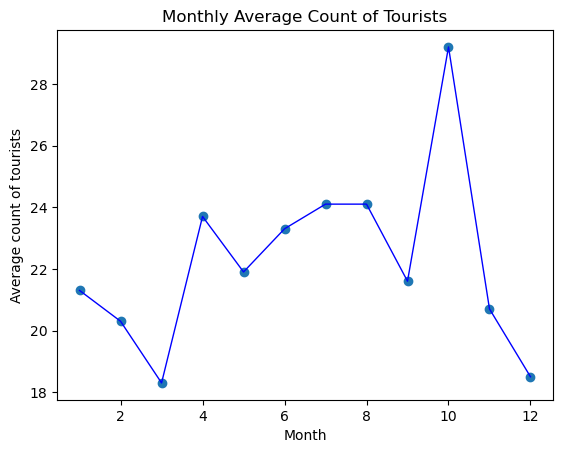

In [14]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
%matplotlib inline
import sklearn
import sklearn.linear_model as lm

# Opening CSV File corresponding to a particular region
location = "Results/Input records/Filtered1M.csv"
df = pd.read_csv(location, header=None)
df2 = pd.to_datetime(df[5], format='%d-%m-%Y')
months = list(range(1, 13))
df[5] = pd.to_datetime(df[5], format='%d-%m-%Y')
ct = []

# Finding data wrt to each Month
for i in months:
    ct.append(len(df.loc[(df[5].dt.month == i)]))
for i in range(len(ct)):
    ct[i] = ct[i] / 10

months = np.asarray(months)
count = np.asarray(ct)

# Plotting the data
plt.scatter(months, count)
plt.plot(months, count, color='blue', linewidth=1)
plt.xlabel("Month")
plt.ylabel("Average count of tourists")
plt.title("Monthly Average Count of Tourists")
plt.show()


In [21]:
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import hdbscan
import folium
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors

# Loading CSV File (Output of Text processing step)
input_file = "Results/TextualMetadataProcessing/TP_op1M.csv"
df = pd.read_csv(input_file)
df1 = df.copy()
coord = {}
Lat = np.asarray(df['Latitude'])
Long = np.asarray(df['Longitude'])
coords = df[['Longitude', 'Latitude']].values
rads = np.radians(coords)

# Clustering step
clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, metric='haversine', gen_min_span_tree=True, min_cluster_size=20, min_samples=None, p=None).fit(rads)
cluster_labels = clusterer.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(-1, num_clusters)])
cluster_label = clusterer.labels_
x = cluster_label
cluster_points = {}
for i in range(num_clusters + 1):
    cluster_points[i] = []

for i in range(len(x)):
    l = cluster_points[x[i]]
    l.append(coords[i])
    cluster_points[x[i]] = l

plt.figure(figsize=(12, 12))

# Plotting points on map
m = Basemap(projection='merc', resolution='l', epsg=4269, llcrnrlon=-122.567288, llcrnrlat=37.696627, urcrnrlon=-122.329308, urcrnrlat=37.852144)
x, y = m(coords[:, 1], coords[:, 0])
m.scatter(x, y, 5, marker='o', color='b')
m.arcgisimage(service='World_Shaded_Relief', xpixels=5000, verbose=False)
plt.show()

def get_cmap(N):
    '''
    Returns a function that maps each index in 0, 1, ... N-1 to a distinct 
    RGB color.
    '''
    color_norm = colors.Normalize(vmin=0, vmax=N-1)
    scalar_map = cmx.ScalarMappable(norm=color_norm, cmap='nipy_spectral')
    def map_index_to_rgb_color(index):
        return scalar_map.to_rgba(index)
    return map_index_to_rgb_color

plt.figure(figsize=(12, 12))

m = Basemap(projection='merc', resolution='l', epsg=4269, llcrnrlon=-122.567288, llcrnrlat=37.696627, urcrnrlon=-122.329308, urcrnrlat=37.852144)

unique_label = np.unique(cluster_labels)
cmaps = get_cmap(num_clusters)

for i, cluster in enumerate(clusters):
    lons_select = cluster[:, 1]
    lats_select = cluster[:, 0]
    x, y = m(lons_select, lats_select)
    m.scatter(x, y, 5, marker='o', color=cmaps(i), zorder=10)

m.arcgisimage(service='World_Shaded_Relief', xpixels=5000, verbose=False)
plt.show()

# Finding Cluster representatives

cluster_exemplar_photoid = {}
cluster_exemplar = {}
for i in range(num_clusters + 1):
    cluster_exemplar[i] = []
    cluster_exemplar_photoid[i] = []

for i in range(num_clusters):
    l = np.rad2deg(clusterer.exemplars_[i])
    cluster_exemplar[i] = l


ModuleNotFoundError: No module named 'hdbscan'

In [20]:
!pip install hdbscan

  Using cached hdbscan-0.8.30.tar.gz (5.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached Cython-0.29.36-py2.py3-none-any.whl (988 kB)
Failed to build hdbscan


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [40 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-310
  creating build\lib.win-amd64-cpython-310\hdbscan
  copying hdbscan\flat.py -> build\lib.win-amd64-cpython-310\hdbscan
  copying hdbscan\hdbscan_.py -> build\lib.win-amd64-cpython-310\hdbscan
  copying hdbscan\plots.py -> build\lib.win-amd64-cpython-310\hdbscan
  copying hdbscan\prediction.py -> build\lib.win-amd64-cpython-310\hdbscan
  copying hdbscan\robust_single_linkage_.py -> build\lib.win-amd64-cpython-310\hdbscan
  copying hdbscan\validity.py -> build\lib.win-amd64-cpython-310\hdbscan
  copying hdbscan\__init__.py -> build\lib.win-amd64-cpython-310\hdbscan
  creating build\lib.win-amd64-cpython-310\hdbscan\tests
  copying hdbscan\tests\test_flat.py -> build\lib.win-amd64-cpython-310\hdbscan\tests
  copying hdbscan\tests\test_hdbscan.py -> build\lib.win-amd64-cpython-310\hdbscan\test

  Using cached hdbscan-0.8.30.tar.gz (5.2 MB)
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached Cython-0.29.36-py2.py3-none-any.whl (988 kB)
Failed to build hdbscan


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [40 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-310
  creating build\lib.win-amd64-cpython-310\hdbscan
  copying hdbscan\flat.py -> build\lib.win-amd64-cpython-310\hdbscan
  copying hdbscan\hdbscan_.py -> build\lib.win-amd64-cpython-310\hdbscan
  copying hdbscan\plots.py -> build\lib.win-amd64-cpython-310\hdbscan
  copying hdbscan\prediction.py -> build\lib.win-amd64-cpython-310\hdbscan
  copying hdbscan\robust_single_linkage_.py -> build\lib.win-amd64-cpython-310\hdbscan
  copying hdbscan\validity.py -> build\lib.win-amd64-cpython-310\hdbscan
  copying hdbscan\__init__.py -> build\lib.win-amd64-cpython-310\hdbscan
  creating build\lib.win-amd64-cpython-310\hdbscan\tests
  copying hdbscan\tests\test_flat.py -> build\lib.win-amd64-cpython-310\hdbscan\tests
  copying hdbscan\tests\test_hdbscan.py -> build\lib.win-amd64-cpython-310\hdbscan\test

  Using cached hdbscan-0.8.30.tar.gz (5.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached Cython-0.29.36-py2.py3-none-any.whl (988 kB)
Failed to build hdbscan


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [40 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-310
  creating build\lib.win-amd64-cpython-310\hdbscan
  copying hdbscan\flat.py -> build\lib.win-amd64-cpython-310\hdbscan
  copying hdbscan\hdbscan_.py -> build\lib.win-amd64-cpython-310\hdbscan
  copying hdbscan\plots.py -> build\lib.win-amd64-cpython-310\hdbscan
  copying hdbscan\prediction.py -> build\lib.win-amd64-cpython-310\hdbscan
  copying hdbscan\robust_single_linkage_.py -> build\lib.win-amd64-cpython-310\hdbscan
  copying hdbscan\validity.py -> build\lib.win-amd64-cpython-310\hdbscan
  copying hdbscan\__init__.py -> build\lib.win-amd64-cpython-310\hdbscan
  creating build\lib.win-amd64-cpython-310\hdbscan\tests
  copying hdbscan\tests\test_flat.py -> build\lib.win-amd64-cpython-310\hdbscan\tests
  copying hdbscan\tests\test_hdbscan.py -> build\lib.win-amd64-cpython-310\hdbscan\test

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.82554e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.87252e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.287e+03, tolerance: 1.841e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check

5.570096763663404

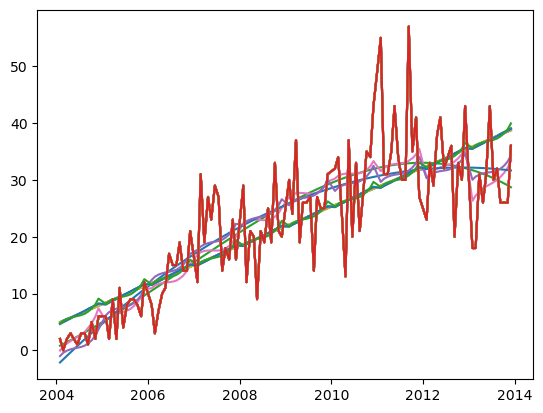

In [22]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
%matplotlib inline
from sklearn import linear_model as lm

regr = lm.LinearRegression()
clf = Lasso(alpha=0.1)

# Loading CSV corresponding to a particular region
df = pd.read_csv("Results/TrendEstimation/fullaustralia.csv", header=None)
df2 = pd.to_datetime(df[5])
months = list(range(1, 13))
years = list(range(2004, 2014))
df[5] = pd.to_datetime(df[5])
ct = []

X_my = []
for year in years:
    for month in months:
        l = [month, year]
        X_my.append(l)
        ct.append(len(df.loc[operator.and_(df[5].dt.year == year, df[5].dt.month == month)]))

df[5] = pd.to_datetime(df[5])
ct_test = []
X_my_test = []
year = 2014
for month in months:
    l = [month, year]
    X_my_test.append(l)
    ct_test.append(len(df.loc[operator.and_(df[5].dt.year == year, df[5].dt.month == month)]))

X_my = np.asarray(X_my)
Ct = np.asarray(ct).reshape(-1, 1)
X_my_test = np.asarray(X_my_test)
Ct_test = np.asarray(ct_test).reshape(-1, 1)

# NORMALIZING MONTH-YEAR VALUE
nry = []
for i in X_my:
    g = i[0]
    k = i[1]
    norm = k + (round((g / 13), 2))
    nry.append(norm)

nry_test = []
for i in X_my_test:
    g = i[0]
    k = i[1]
    norm = k + (round((g / 13), 2))
    nry_test.append(norm)

# Linear - deg 1 and 2
poly = make_pipeline(PolynomialFeatures(1), regr)

# nry vs no of tourists
# Trying out various combinations

poly.fit(np.asarray(nry).reshape(-1, 1), Ct)
Y_pred = poly.predict(np.asarray(nry).reshape(-1, 1))
plt.plot(np.asarray(nry), Y_pred.reshape(-1, 1))
plt.plot(np.asarray(nry), Ct)
mean_absolute_error(Ct, Y_pred)

poly = make_pipeline(PolynomialFeatures(3), regr)
poly.fit(np.asarray(nry).reshape(-1, 1), Ct)
Y_pred = poly.predict(np.asarray(nry).reshape(-1, 1))
plt.plot(np.asarray(nry), Y_pred)
plt.plot(np.asarray(nry), Ct)
mean_absolute_error(Ct, Y_pred)

poly = make_pipeline(PolynomialFeatures(1), regr)

# X_my vs No of tourists

poly.fit(X_my, Ct)
Y_pred = poly.predict(X_my)
plt.plot(np.asarray(nry), Y_pred.reshape(-1, 1))
plt.plot(np.asarray(nry), Ct)
mean_absolute_error(Ct, Y_pred)

poly = make_pipeline(PolynomialFeatures(3), regr)
poly.fit(X_my, Ct)
Y_pred = poly.predict(X_my)
plt.plot(np.asarray(nry), Y_pred)
plt.plot(np.asarray(nry), Ct)
mean_absolute_error(Ct, Y_pred)

# Ridge - deg 1 and 2
poly = make_pipeline(PolynomialFeatures(1), Ridge())

# nry vs no of tourists

poly.fit(np.asarray(nry).reshape(-1, 1), Ct)
Y_pred = poly.predict(np.asarray(nry).reshape(-1, 1))
plt.plot(np.asarray(nry), Y_pred.reshape(-1, 1))
plt.plot(np.asarray(nry), Ct)
mean_absolute_error(Ct, Y_pred)

poly = make_pipeline(PolynomialFeatures(3), Ridge())
poly.fit(np.asarray(nry).reshape(-1, 1), Ct)
Y_pred = poly.predict(np.asarray(nry).reshape(-1, 1))
plt.plot(np.asarray(nry), Y_pred)
plt.plot(np.asarray(nry), Ct)
mean_absolute_error(Ct, Y_pred)

poly = make_pipeline(PolynomialFeatures(1), Ridge())

# X_my vs No of tourists
poly.fit(X_my, Ct)
Y_pred = poly.predict(X_my)
plt.plot(np.asarray(nry), Y_pred.reshape(-1, 1))
plt.plot(np.asarray(nry), Ct)
mean_absolute_error(Ct, Y_pred)

poly = make_pipeline(PolynomialFeatures(3), Ridge())
poly.fit(X_my, Ct)
Y_pred = poly.predict(X_my)
plt.plot(np.asarray(nry), Y_pred)
plt.plot(np.asarray(nry), Ct)
mean_absolute_error(Ct, Y_pred)

# Lasso - deg 1 and 2
poly = make_pipeline(PolynomialFeatures(1), clf)

# nry vs no of tourists

poly.fit(np.asarray(nry).reshape(-1, 1), Ct)
Y_pred = poly.predict(np.asarray(nry).reshape(-1, 1))
plt.plot(np.asarray(nry), Y_pred.reshape(-1, 1))
plt.plot(np.asarray(nry), Ct)
mean_absolute_error(Ct, Y_pred)

poly = make_pipeline(PolynomialFeatures(3), clf)
poly.fit(np.asarray(nry).reshape(-1, 1), Ct)
Y_pred = poly.predict(np.asarray(nry).reshape(-1, 1))
plt.plot(np.asarray(nry), Y_pred)
plt.plot(np.asarray(nry), Ct)
mean_absolute_error(Ct, Y_pred)

# X_my vs No of tourists

poly = make_pipeline(PolynomialFeatures(1), clf)

poly.fit(X_my, Ct)
Y_pred = poly.predict(X_my)
plt.plot(np.asarray(nry), Y_pred.reshape(-1, 1))
plt.plot(np.asarray(nry), Ct)
mean_absolute_error(Ct, Y_pred)
poly = make_pipeline(PolynomialFeatures(3), clf)

poly.fit(X_my, Ct)
Y_pred = poly.predict(X_my)
plt.plot(np.asarray(nry), Y_pred)
plt.plot(np.asarray(nry), Ct)
mean_absolute_error(Ct, Y_pred)


C:\Users\HP\AppData\Local\Temp\ipykernel_17864\807235880.py:17: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df2 = pd.to_datetime(df[5])
C:\Users\HP\AppData\Local\Temp\ipykernel_17864\807235880.py:19: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df[5] = pd.to_datetime(df[5])


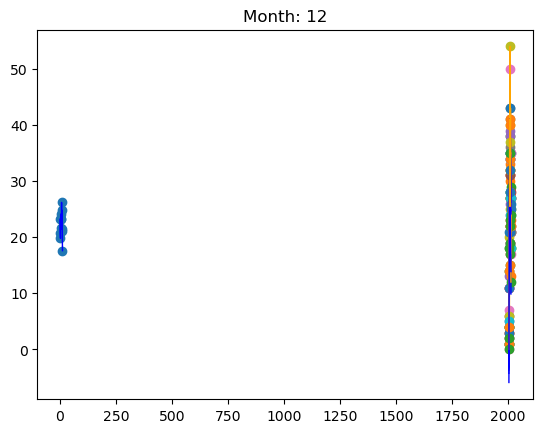

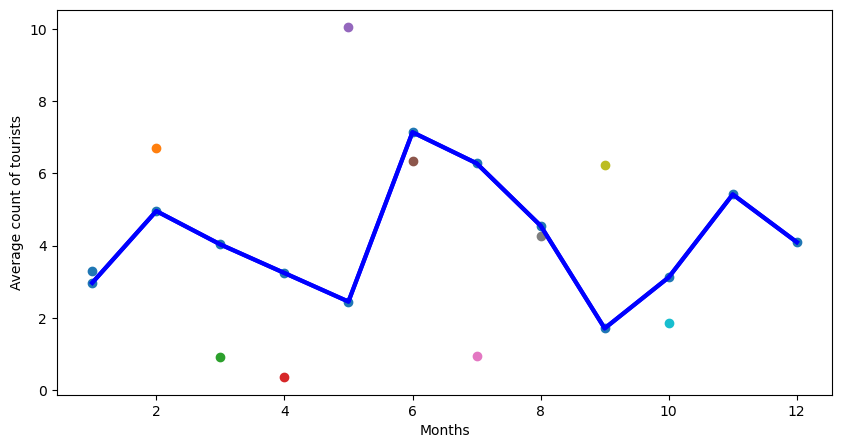

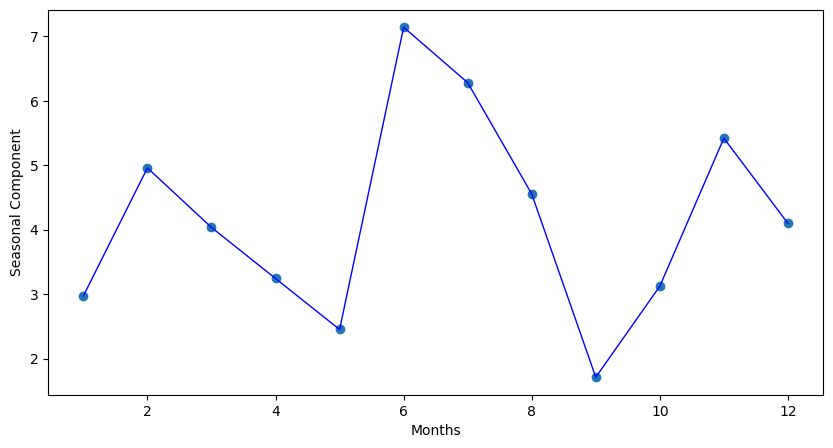

In [32]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
%matplotlib inline
import calendar
import sklearn
import sklearn.linear_model as lm

# Opening CSV File corresponding to a particular region
location = "Results/Input records/Filtered1M.csv"
df = pd.read_csv(location, header=None)
df2 = pd.to_datetime(df[5])
months = list(range(1, 13))
df[5] = pd.to_datetime(df[5])
ct = []

# Finding data wrt to each Month
for i in months:
    ct.append(len(df.loc[(df[5].dt.month == i)]))
for i in range(len(ct)):
    ct[i] = ct[i] / 10

months = np.asarray(months)
count = np.asarray(ct)
plt.scatter(months, count)
plt.plot(months, count, color='blue', linewidth=1)
months = list(range(1, 13))
year = list(range(2004, 2014))
allmonths = {}

for i in months:
    allmonths[i] = []
for i in year:
    for j in months:
        allmonths[j].append(len(df.loc[operator.and_(df[5].dt.year == i, df[5].dt.month == j)]))

# Checking value for April
regr = lm.LinearRegression()
sc = []

# Plotting data for each month to find Trend for that particular month

for month in months:
    monthCt = np.asarray(allmonths[month])
    yr = np.asarray(year)

    plt.scatter(year, monthCt)

    poly = make_pipeline(PolynomialFeatures(3), regr)

    poly.fit(yr.reshape(-1, 1), monthCt)

    Y_pred = poly.predict(yr.reshape(-1, 1).reshape(-1, 1))

    plt.plot(year, monthCt, color="orange", linewidth=1)
    plt.plot(year, Y_pred.reshape(-1, 1), color='blue', linewidth=1)

    month_diff = []
    for i in range(len(monthCt)):
        month_diff.append(abs(monthCt[i] - Y_pred[i]))

    sc.append(mean_absolute_error(monthCt, Y_pred))

    plt.title("Month: {}".format(month))
    mean_absolute_error(monthCt, Y_pred)

# Plot of Months with average no. of visitors
fig, ax = plt.subplots(figsize=(10, 5))
month_average_diff = [np.mean(diff) if isinstance(diff, list) else diff for diff in month_diff]

for month in range(1, 13):
    if month <= len(month_diff) and isinstance(month_diff[month-1], list):
        ax.scatter(month, np.asarray(month_diff[month-1]))
    elif month <= len(month_diff):
        ax.scatter(month, month_diff[month-1])
    
ax.scatter(months, np.asarray(sc))
ax.plot(months, np.asarray(sc), color='blue', linewidth=3)

ax.set_xlabel("Months")
ax.set_ylabel("Average count of tourists")

ax.plot(months, np.asarray(sc), color='blue', linewidth=3)

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(months, np.asarray(sc))
ax.set_xlabel("Months")
ax.set_ylabel("Seasonal Component")
ax.plot(months, np.asarray(sc), color='blue', linewidth=1)
